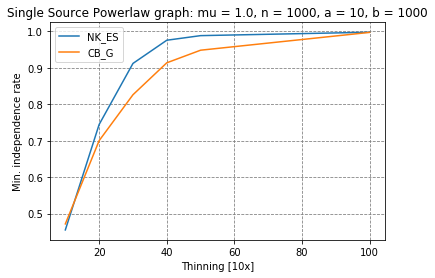

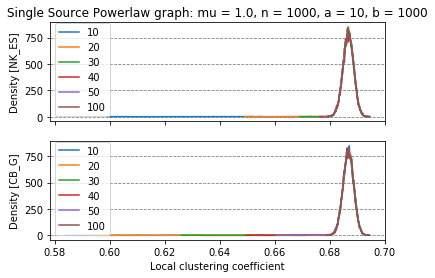

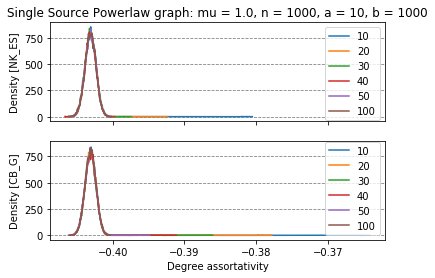

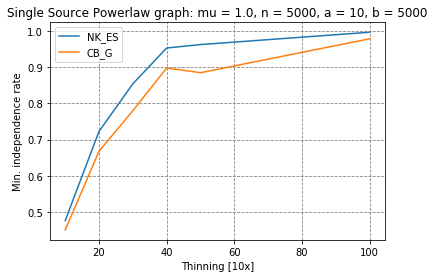

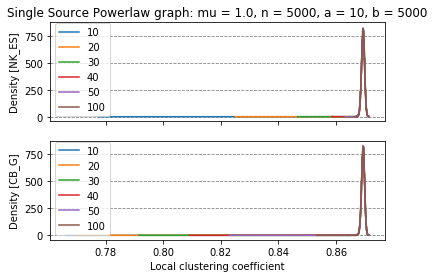

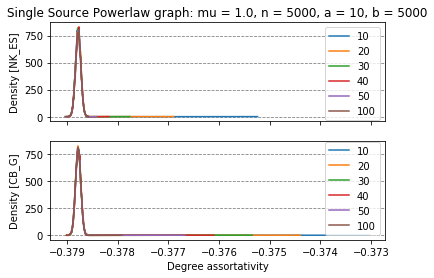

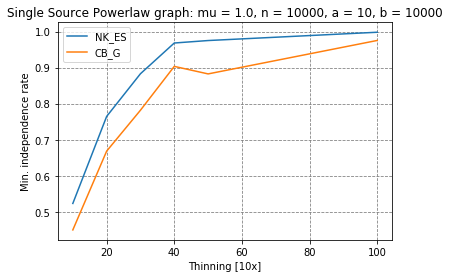

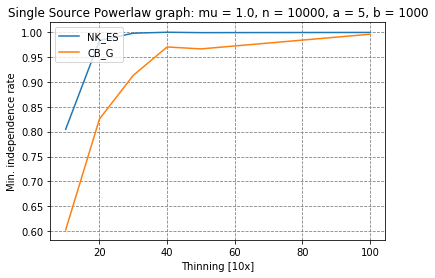

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

abv_dict = {
    "LCC" : "Local clustering coefficient",
    'DA'  : "Degree assortativity",
    "TRI" : "Triangle count",
    "IND" : "Independence-Rate",
    "DIAM" : "Diameter",
    "NETWORKIT_ES" : "NK_ES",
    "CB_UNIFORM" : "CB_U",
    "CB_GLOBAL" : "CB_G"
}
rand_xlabel = {
    "NETWORKIT_ES" : " [m/10]",
    "CB_UNIFORM" : " [m/(10*avgdeg)]",
    "CB_GLOBAL" : ""
}

def plot_line_histogram(graph_dataset, thins, axis, rand):
    for graph_data in graph_dataset:
        data = np.array(graph_data)
        y, binEdges = np.histogram(data, bins='fd')
        bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
        axis.set_ylabel("Density [{}]".format(abv_dict[rand]))
        axis.plot(bincenters, y, '-')
    axis.legend(thins)
    axis.set_axisbelow(True)
    axis.yaxis.grid(color='gray', linestyle='dashed')
"""
    Dataline:
    Label
    RunL
    Gen
    Rand
    PID
    Thin
    Mu
    N
    P1
    P2
    P3
    Type
    Val
"""

orig_df = pd.read_csv("Data.dat", sep='\t')
orig_df[['RunL', 'Thin', 'Mu', 'N', 'Val']] = orig_df[['RunL', 'Thin', 'Mu', 'N', 'Val']].apply(pd.to_numeric)

labels = pd.unique(orig_df['Label'].values)
for label in labels:
    df = orig_df.loc[orig_df['Label'] == label]
    
    # Assumes PLDHH
    thins = pd.unique(df['Thin'].values)
    mus = pd.unique(df['Mu'].values)
    metrics = pd.unique(df['Type'].values)
    ns = pd.unique(df['N'].values)
    rands = pd.unique(df['Rand'].values)
    p1s = pd.unique(df['P1'].values)
    p2s = pd.unique(df['P2'].values)
    p3s = pd.unique(df['P3'].values)

    rand_size = len(rands)

    for mu, n, p1, p2, p3 in itertools.product(mus, ns, p1s, p2s, p3s):
        # Plot Worst Case Independence Rates in one plot        
        subdf = df.loc[(df['Mu'] == mu) & (df['N'] == n) & (df['P1'] == p1) & (df['P2'] == p2) & (df['P3'] == p3)]
        for rand in rands:
            title = "Single Source Powerlaw graph: mu = {}, n = {}, a = {}, b = {}".format(mu, n, p2, p3)
            if "IND" in metrics:
                data = subdf.loc[(subdf['Type'] == 'IND') & (subdf['Rand'] == rand)]
                mins = data.groupby(['Thin'])['Val'].min()
                plt.plot(mins.index, mins, label=abv_dict[rand])
                plt.title(str(title))
        plt.xlabel('Thinning [10x]')
        plt.ylabel('Min. independence rate')
        plt.legend(loc='upper left')
        plt.grid(color='gray', linestyle='dashed')
        plt.show()
        plt.close()        

        for metric in metrics:
            if metric == 'IND':
                continue
            if metric == 'DIAM': #TODO
                continue

            # Plot metrics below for each rand
            fig, axarr = plt.subplots(rand_size, sharey=True, sharex=True)
            for ix, rand in zip(range(rand_size), rands):
                data = [subdf.loc[(subdf['Thin'] == thin) & (subdf['Type'] == metric) & (subdf['Rand'] == rand)]['Val'] for thin in thins]
                plot_line_histogram(data, thins, axarr[ix], rand)

            axarr[0].set_title(title)
            plt.xlabel(abv_dict[metric])
            plt.show()
            plt.close()